In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import joblib

In [2]:
#Load dataset
data = pd.read_csv(r'C:\Users\Asad\DataSets\hmnist_28_28_RGB.csv')
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [3]:
num_classes = data['label'].nunique()
print("Total number of classes:", num_classes)

Total number of classes: 7


In [4]:
input_shape = data.shape
print("Input shape:", input_shape)

Input shape: (10015, 2353)


In [5]:
x=data.drop('label', axis=1)
Y=data[['label']]

In [7]:
X = np.array(x)

In [8]:
X.shape

(10015, 2352)

In [9]:
Y.shape

(10015, 1)

In [10]:
y = Y.squeeze()

In [12]:
y = np.array(y)

In [13]:
X=np.array(x)
first_image = X[0].reshape((28, 28, 3)) / 255.0
first_image

array([[[0.75294118, 0.6       , 0.75686275],
        [0.76470588, 0.60784314, 0.75294118],
        [0.77254902, 0.60392157, 0.7254902 ],
        ...,
        [0.75686275, 0.56470588, 0.6       ],
        [0.77254902, 0.60392157, 0.63921569],
        [0.76078431, 0.59607843, 0.62745098]],

       [[0.77254902, 0.63529412, 0.79215686],
        [0.78823529, 0.62745098, 0.77254902],
        [0.79215686, 0.62745098, 0.75686275],
        ...,
        [0.76078431, 0.57647059, 0.58431373],
        [0.77647059, 0.61960784, 0.65098039],
        [0.75294118, 0.6       , 0.65490196]],

       [[0.77254902, 0.60784314, 0.75686275],
        [0.77647059, 0.60392157, 0.7254902 ],
        [0.79215686, 0.61176471, 0.74901961],
        ...,
        [0.76078431, 0.58431373, 0.59607843],
        [0.78039216, 0.63137255, 0.69411765],
        [0.76078431, 0.61176471, 0.68627451]],

       ...,

       [[0.76078431, 0.61568627, 0.74901961],
        [0.80784314, 0.67843137, 0.80784314],
        [0.80784314, 0

In [16]:
y[0]

2

In [17]:
lda = LinearDiscriminantAnalysis(n_components=6)
X_lda = lda.fit_transform(x, y)

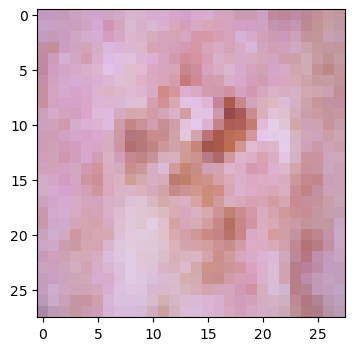

In [18]:
plt.figure(figsize=(4, 4))
plt.imshow(first_image, cmap=plt.cm.gray)
plt.show()

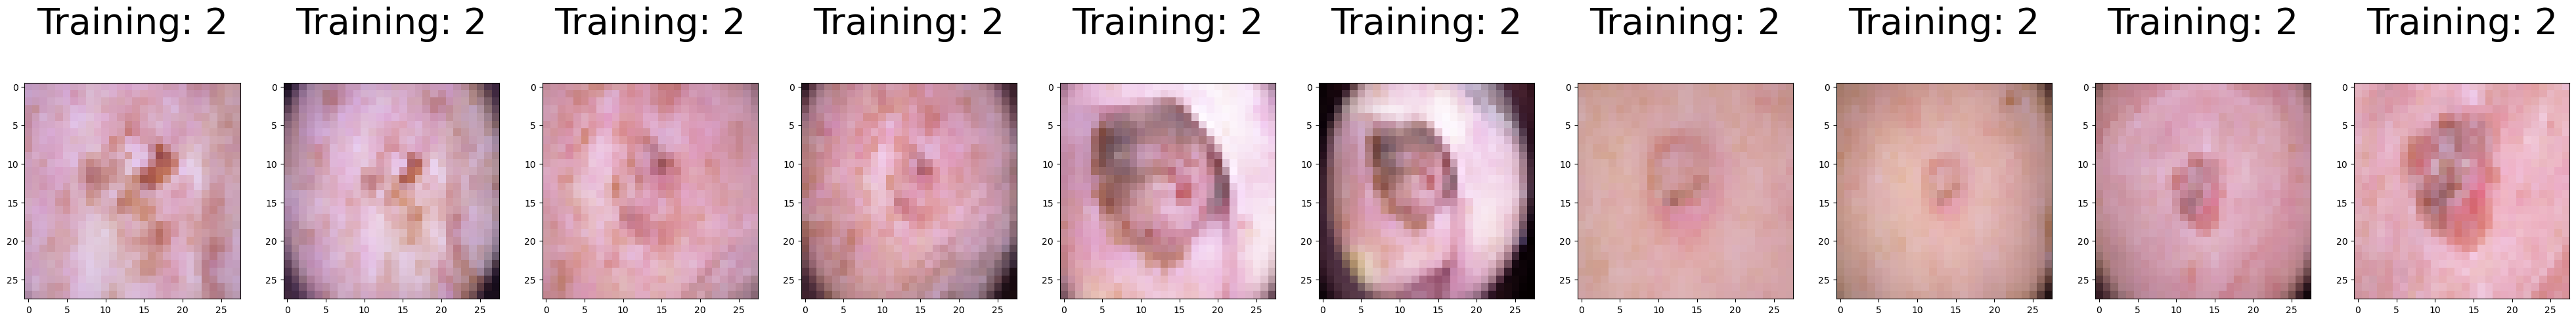

In [19]:
plt.figure(figsize=(50,10))
for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(1, 10, index+1)
    reshaped_image = image.reshape((28, 28, 3))/255.0
    plt.imshow(reshaped_image, cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=40)

In [23]:
#splitting the dataset to train and test
x_train, x_test, y_train, y_test=train_test_split(X_lda, y, test_size=0.25, random_state=100)

In [24]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7511, 6) (2504, 6) (7511,) (2504,)


In [25]:
# x_train = x_train.reshape(-1, 6)/255.0
# x_test = x_test.reshape(-1, 6)/255.0

In [26]:
# Build a simple ANN architecture (input layers), hidden layers=2, output layer=1)
annmodel = Sequential([
    Dense(10, activation='relu', input_shape=(6,)),
    Dense(68, activation='relu'),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])


In [27]:
annmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
annmodel.fit(x_train, y_train, epochs=5, batch_size=44, validation_data=(x_test, y_test))

Epoch 1/5
171/171 [==============================] - 3s 7ms/step - loss: 0.7747 - accuracy: 0.7658 - val_loss: 0.4646 - val_accuracy: 0.8482
Epoch 2/5
171/171 [==============================] - 1s 5ms/step - loss: 0.4092 - accuracy: 0.8567 - val_loss: 0.3849 - val_accuracy: 0.8710
Epoch 3/5
171/171 [==============================] - 1s 4ms/step - loss: 0.3689 - accuracy: 0.8697 - val_loss: 0.3573 - val_accuracy: 0.8782
Epoch 4/5
171/171 [==============================] - 1s 4ms/step - loss: 0.3512 - accuracy: 0.8734 - val_loss: 0.3459 - val_accuracy: 0.8838
Epoch 5/5
171/171 [==============================] - 1s 5ms/step - loss: 0.3430 - accuracy: 0.8782 - val_loss: 0.3412 - val_accuracy: 0.8886


In [29]:
test_loss, test_acc = annmodel.evaluate(x_test, y_test)
#joblib.dump(cnnmodel, 'cnn_model.joblib')
print(f"Test accuracy: {test_acc}")

79/79 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8886
Test accuracy: 0.8885782957077026


In [30]:
y_test.shape

(2504,)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
y_pred = annmodel.predict(x_test)
y_pred.shape

79/79 [==============================] - 0s 3ms/step


(2504, 7)

TypeError: Image data of dtype object cannot be converted to float

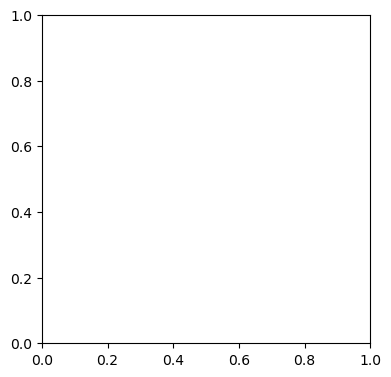

In [45]:
plt.figure(figsize=(50,10))
for index, (image, label) in enumerate(zip(y_pred[0:10], y_test[0:10])):
    plt.subplot(1, 10, index+1)
    reshaped_image = image.reshape((2, 2, 3))/255.0
    plt.imshow(reshaped_image, cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=40)

In [ ]:
plt.imshow(x_test[index][0:4].reshape((2,2)))